<a href="https://colab.research.google.com/github/RaviSahu1520/Electric-Vehicle-EDA/blob/main/Electric_Vehicle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/dataset.xlsx")
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
print(df.shape,df.size)

(112634, 17) 1914778


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
# as we see clearly that there are many null values in our data in differ differ columns

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112152 non-null  object 
 1   County                                             112152 non-null  object 
 2   City                                               112152 non-null  object 
 3   State                                              112152 non-null  object 
 4   Postal Code                                        112152 non-null  int64  
 5   Model Year                                         112152 non-null  int64  
 6   Make                                               112152 non-null  object 
 7   Model                                              112152 non-null  object 
 8   Electric Vehicle Type                              112152 non-null  object 
 9 

In [ ]:
# so now our data have no null values

In [ ]:
# in our data , datatype is perfectly arrange already

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
# there is an mistake in a column name county
df.rename(columns={'County':'Country'},inplace=True)

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
df.columns

Index(['vin (1-10)', 'country', 'city', 'state', 'postal code', 'model year',
       'make', 'model', 'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'legislative district', 'dol vehicle id',
       'vehicle location', 'electric utility', '2020 census tract'],
      dtype='object')

In [ ]:
# so our columns is now perfectly organise

# **Univariate Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

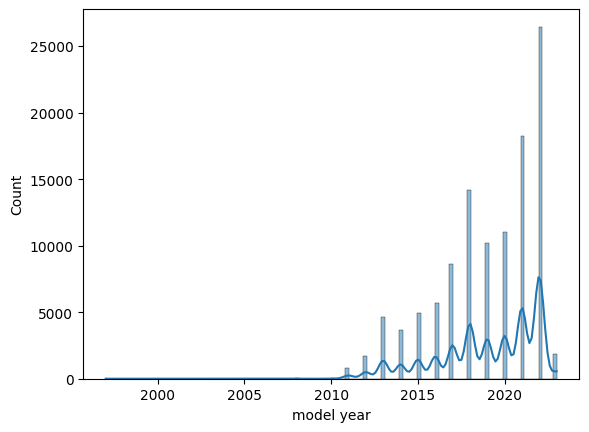

In [ ]:
sns.histplot(df["model year"],kde=True)
plt.show()

In [ ]:
# by this visualization you see that electric vehicles are start manufacturing from 2000
# but boom came in market after 2015 and in 2022 this market went high top

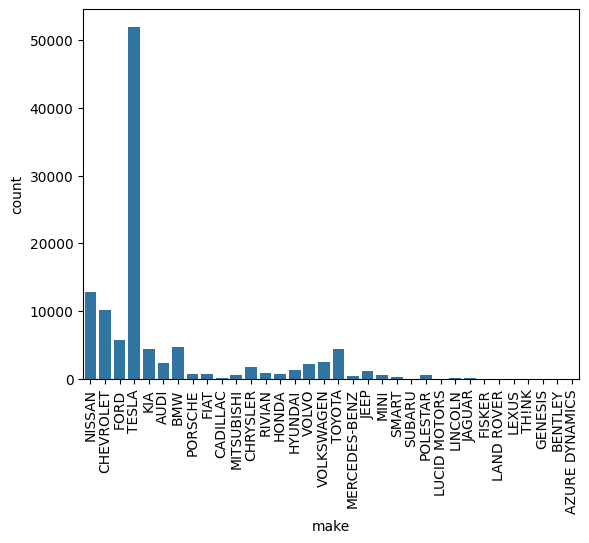

In [ ]:
sns.countplot(x='make', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Really TESLA make this market in ploting you see that TESLA is only brand which has high block .
# we also see that other brand also include it but in comparison with tesla they are too small .

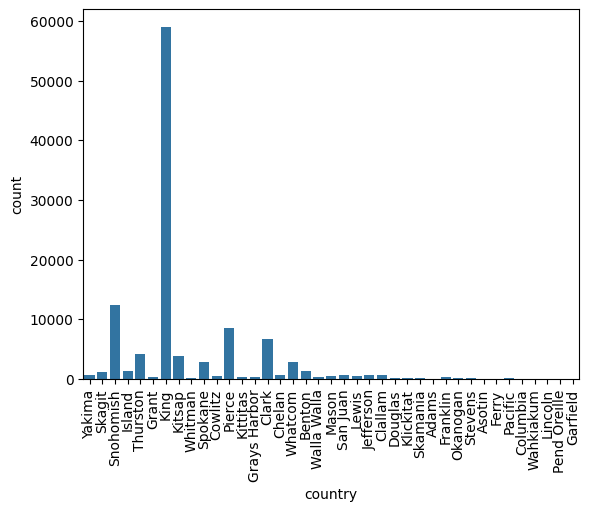

In [ ]:
sns.countplot(x='country', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# unbeliable only country which make noise in whole market woww.....

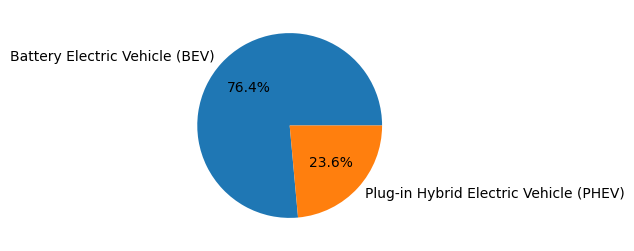

In [ ]:
plt.pie(df['electric vehicle type'].value_counts(),labels=df['electric vehicle type'].value_counts().index,autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.show()

In [ ]:
# PHEV vehicles are also have some amount of vehicles in market

# **Bi-Variate Analysis**

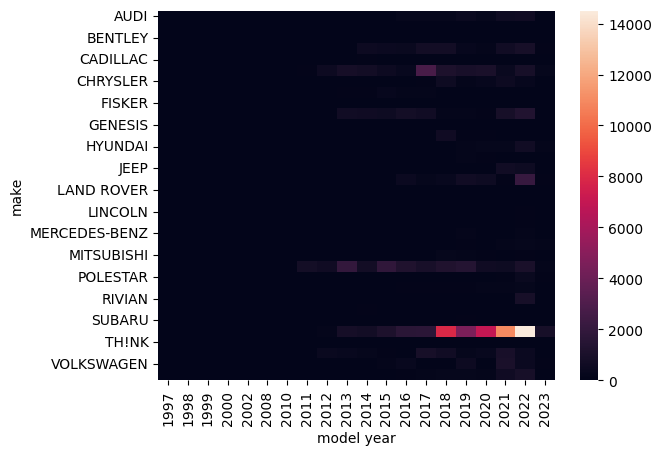

In [ ]:
car_data = df.groupby(['make', 'model year']).size().unstack(fill_value=0)
sns.heatmap(car_data,  fmt='d')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# as you see SUBARU brand have made mostly car after 2018 and most at 2022

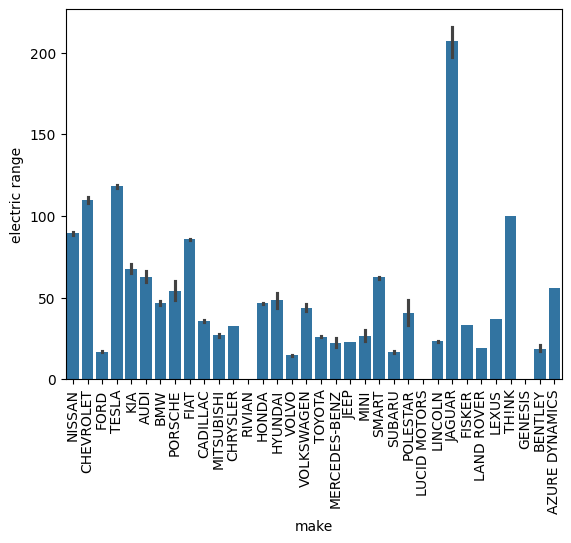

In [ ]:
sns.barplot(x='make' , y='electric range' , data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:

# jaguar cars has covering high range now-a-days

In [ ]:
car_data = df.groupby(['make', 'model year']).size().reset_index(name='Count')
mean_counts = car_data.groupby('make')['Count'].mean()
std_counts = car_data.groupby('make')['Count'].std()
error = std_counts / np.sqrt(car_data.groupby('make')['Count'].count())

<ipython-input-29-3ef96cada37c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='make', y='Count', data=car_data, ci=None)  # ci=None to avoid automatic error bars


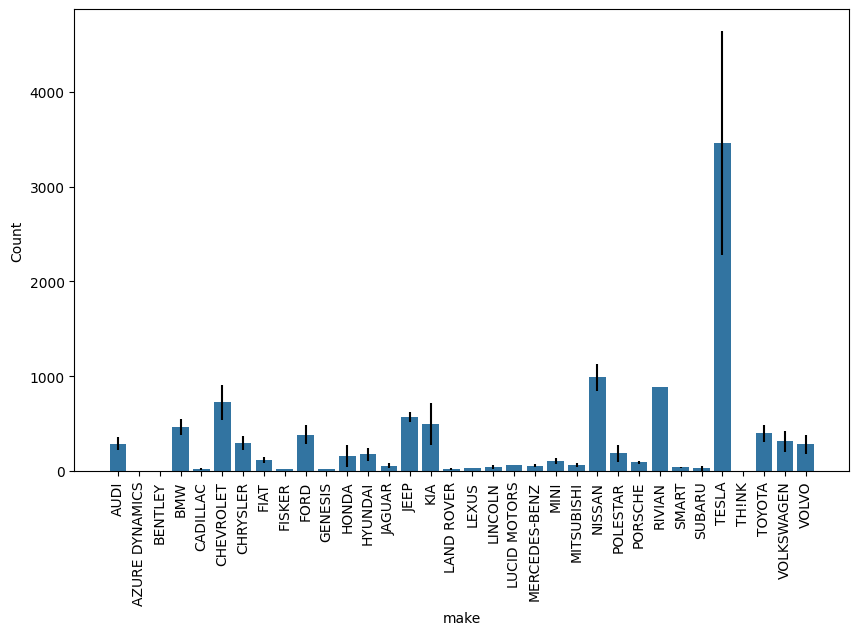

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='Count', data=car_data, ci=None)  # ci=None to avoid automatic error bars
plt.errorbar(x=mean_counts.index, y=mean_counts, yerr=error, fmt='none', c='black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
model_counts = df.groupby(['make', 'model']).size().reset_index(name='Count')
most_produced_models = model_counts.loc[model_counts.groupby('make')['Count'].idxmax()]
most_produced_models_sorted = most_produced_models.sort_values(by='Count', ascending=False)
print(most_produced_models_sorted)

               make                     model  Count
95            TESLA                   MODEL 3  23042
81           NISSAN                      LEAF  12846
27        CHEVROLET                   BOLT EV   4895
102          TOYOTA               PRIUS PRIME   2365
57              KIA                      NIRO   2252
18              BMW                        I3   1888
38             FORD                    FUSION   1827
31         CHRYSLER                  PACIFICA   1780
106      VOLKSWAGEN                      ID.4   1480
55             JEEP                  WRANGLER   1096
32             FIAT                       500    820
113           VOLVO                      XC90    817
3              AUDI                    E-TRON    795
45            HONDA                   CLARITY    779
89           RIVIAN                       R1T    672
82         POLESTAR                       PS2    557
47          HYUNDAI                   IONIQ 5    542
80       MITSUBISHI                 OUTLANDER 

In [ ]:
# in this analysis we again seee that tesla has huge amount of market now-a-days
# by this text analysis you are able to understand our next plot

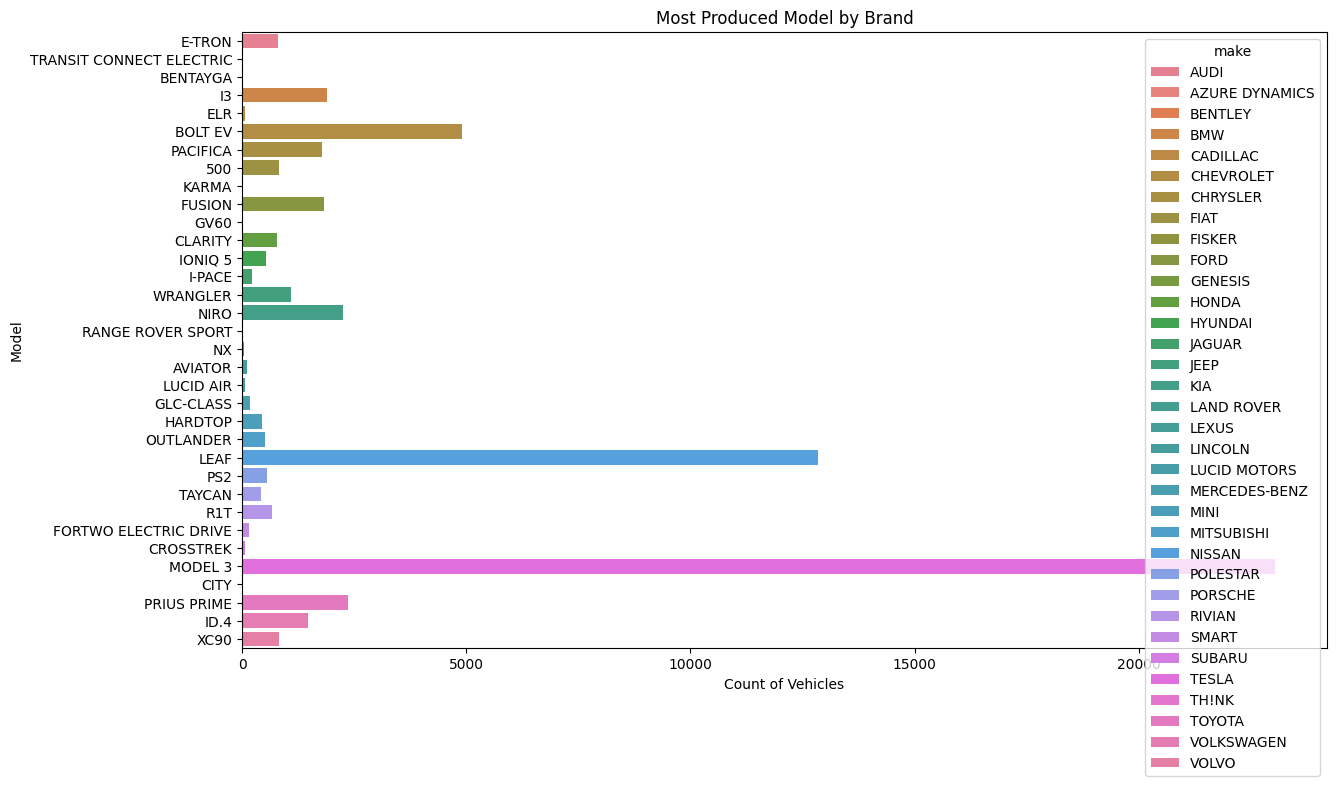

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
model_counts = df.groupby(['make', 'model']).size().reset_index(name='Count')
most_produced_models = model_counts.loc[model_counts.groupby(['make'])['Count'].idxmax()]

plt.figure(figsize=(14, 8))
sns.barplot(data=most_produced_models, x='Count', y='model', hue='make', dodge=False)

plt.title('Most Produced Model by Brand')
plt.xlabel('Count of Vehicles')
plt.ylabel('Model')
plt.show()


In [ ]:
# wow such an amazing result so we clearly see that tesla model 3 has huge demand in the market
# and nissan leaf has 2nd in this race

By the whole analysis some good insights find by me.

(1) there are many brands present in market but only some of them are making profit and still stand in market like :- Tesla,Nissan,Chervolet , etc....

(2) when i looked at range covered by vehicle then jaguar beat tesla so i think tesla will has to work on this problem .....

(3) only few countries are there which have a huge amount of electric vehicle market and and some countries has negligible market so i think brands should be increase marketing in that countries so that company will make profit .

# **Thank You**



---



# **TASK - 2**

In [61]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [69]:
import pandas as pd
import plotly.express as px

df = pd.read_excel('/content/drive/MyDrive/dataset.xlsx')
ev_count_by_state = df.groupby('State').size().reset_index(name='EV_Count')
fig = px.choropleth(ev_count_by_state,
                    locations='State',
                    locationmode="USA-states",
                    color='EV_Count',
                    scope="usa",
                    title="Number of EV Vehicles by State",
                    color_continuous_scale="Viridis")
fig.show()


In [44]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_('/content/drive/MyDrive/dataset.xlsx')

ev_count_by_state_year = df.groupby(['State', 'Model Year']).size().reset_index(name='EV_Count')

# Creating a Choropleth map with animation and enhanced hover data
fig = px.choropleth(ev_count_by_state_year,
                    locations='State',
                    locationmode="USA-states",
                    color='EV_Count',
                    animation_frame='Model Year', # Animating by 'Model Year'
                    hover_name='State',
                    hover_data={'EV_Count': True, 'Model Year': True},
                    scope="usa",
                    title="Number of EV Vehicles by State Over the Years",
                    color_continuous_scale="Viridis")

# Enhancing layout and visuals
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)', # Change lake color
        projection_scale=1  # Adjust the projection scale
    ),
    title_x=0.5,  # Center the title
    coloraxis_colorbar=dict(
        title="EV Count",  # Labeling the color bar
        ticks="outside"  # Show ticks on the outside
    )
)

# Display the enhanced map
fig.show()


#TASK -3

In [46]:
!pip install bar_chart_race

In [37]:
!pip install bar-chart-race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.0 MB/s eta 0:00:00


In [38]:
import bar_chart_race as bcr
ev_make_counts = df.groupby(['model year', 'make']).size().unstack().fillna(0)

bcr.bar_chart_race(
    df=ev_make_counts,
    filename='ev_make_racing_bar.mp4',
    orientation='h',
    sort='desc',
    title='EV Make Count Over the Years',
    steps_per_period=50,
    period_length=2000,
    period_label={'x': .95, 'y': .15, 'ha': 'right', 'va': 'center', 'size': 72, 'weight': 'semibold'},
    bar_kwargs={'alpha': .99, 'lw': 0},
    period_fmt='{x:.0f}',
)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
